<a href="https://colab.research.google.com/github/dzakyfaishalariq/KlasifikasiBungaIris/blob/main/KlasifikasiBungaIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd

# PEMBACAAN DATA

Pembacaan data menggunakan metode library pandas

`pd.read_csv`

In [12]:
df = pd.read_csv('iris.csv')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Memeriksa data yang kosong

Pada data ini kita melihat bagian dalam tabel iris, apakah ada nilai yang kosong dengan menggunakan kode berikut:

`df.isnull().any()`

In [13]:
df.isnull().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

Dilihat dari output di atas, kita dapat menyimpulkan bahwa semua fitur atau kolom tidak ada yang bernilai kosong karena bernilai `false`.

# Class colom value converter

Dalam konverter nilai, nilai kolom kelas akan dikonversi dari nominal ke numerik atau integer. Dengan memeriksa jumlah kategori kelas yang ada menggunakan `unique()`

In [14]:
kategori = 0
classKategori = {}
for i in df['class'].unique():
  classKategori['{}'.format(i)] = kategori
  print("{}:{}".format(kategori,i))
  kategori += 1
# memasukan ke dalam tabel colom class
print("Tabel yang sudah diubah : ")
df['class'] = df['class'].map(classKategori)
df

0:Iris-setosa
1:Iris-versicolor
2:Iris-virginica
Tabel yang sudah diubah : 


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Dalam set data yang dikonversi di mana kami mengubah nilai kolom kelas dari nominal menjadi numerik.

|Nama|Kode|
|----|----------|
|Iris-satosa|0|
|Iris-versicolor|1|
|Iris-virginica|2|

Kode yang digunakan untuk mengubah data dari panda menggunakan fungsi `map()`, dengan parameter yang dimasukkan ke dalam fungsi map dari data diktat yang kita inisialisasi dengan nama `kelasKategori = {}` dan memanggil kolom yang sesuai untuk diubah dengan kode :

```
df['namaKolom'].map(kelasKategori)
```

# Melihat hubungan antara fitur atau kolom menggunakan korelasi

Tahap ini akan melihat hubungan antar kolom yang akan berguna untuk memilih kolom mana yang tidak memiliki hubungan sama sekali dan dapat dihapus dari tabel. Di sini kita menggunakan fungsi: `corr()`
Bantuan untuk memvisualisasikannya dengan menggunakan `seaborn`.

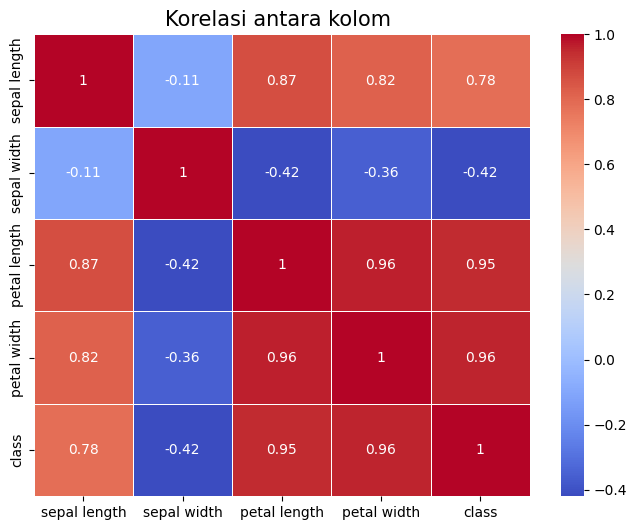

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
korelasi = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(korelasi,annot=True,cmap='coolwarm',linewidths=0.5,xticklabels=korelasi.columns,yticklabels=korelasi.columns)
plt.title("Korelasi antara kolom ", fontsize=15)
plt.show()


Disana kita menggunakan tabel dari seborn dengan kode `sns.heatmap` yang mana di dapatkan beberapa hubungan yang ada di dalam tiap kolom yang kita analisis tersebut dari tabel `iris.csv` yang mana:

|kolom 1|kolom 2| hubungan|
|------|-------|--------|
|sepal length|class|0.78|
|sepal length|petal width|0.82|
|sepal length|petal langth|0.87|
|petal length|class|0.95|
|petal length|petal width|0.96|
|petal length|sepal length|0.87|
|petal width|class|0.96|
|petal width|petal length|0.96|
|petal width|sepal length|0.82|

dilihat dari tabel yang kita telaah maka semua vitur memiliki hubungan yang sangat kuat maka semua fitur sangat penting

# Pisahkan data untuk mengambil data latih dan data uji sebanyak 80% dan 20%.

Tahap ini merupakan pemisahan untuk membuat data latih dan data uji masing-masing sebanyak
- data pelatihan: 80%
- data testing : 20%

menggunakan sklearn

sebelum melakukan pembagian kita akan memisahkan nilai X dan y nya:
- X sebagai fitur dengan `df.drop`
- y sebagai target dengan `df['target']`

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']

pada pembagian ini ada beberapa parameter yang mana kita dapat melihat pada kode dibawah ini:
- X,y = merupakan nilai fitur dan target
- test_size = 0.2 mengambil data testing 20 %
- random_state=42 untuk merandom datasets sebanyak 42 baris tiap random urutanya.

In [22]:
X_train,X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [28]:
print("banyak data train : {} ".format(len(X_train)))
print("banyak data test : {} ".format(len(X_test)))


banyak data train : 120 
banyak data test : 30 


# Pembuatan Model

In [36]:
print("Banyak inputan untuk data : ")
print(X_train.shape[1])
print("Banyak Output untuk target : ")
print(len(y_train.unique()))

Banyak inputan untuk data : 
4
Banyak Output untuk target : 
3


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
input_len = X_train.shape[1]
output_len = len(y_train.unique())
model = Sequential()
model.add(InputLayer(input_shape=input_len))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(output_len, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32
)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.6750
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5533 - accuracy: 0.6750
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5460 - accuracy: 0.6750
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5392 - accuracy: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.6750
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5265 - accuracy: 0.6833
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5208 - accuracy: 0.6833
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5152 - accuracy: 0.6833
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5099 - accuracy: 0.6833
Epoch 11/100
4/4 [===========

# melakukan prediksi

In [63]:
sepal_length = float(input("sepal length : "))
sepal_width = float(input("sepal width : "))
petal_length = float(input("petal length : "))
petal_width = float(input("petal width : "))

predik = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])
print(predik)
print(np.argmax(predik))

sepal length : 3.3
sepal width : 3.1
petal length : 6.1
petal width : 6
1/1 [==============================] - 0s 29ms/step
[[0.00854174 0.20918807 0.78227013]]
2


In [60]:
X_test

,sepal length,sepal width,petal length,petal width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [53]:
nilai = model.predict(X_test)
nilai_y_predik = []
for data in nilai:
  nilai_y_predik.append(np.argmax(data))
databaru = {
    "dataPredik":nilai_y_predik,
    "dataAsli":y_test
}
data_pengecekan = pd.DataFrame(databaru)
data_pengecekan

1/1 [==============================] - 0s 22ms/step


,dataPredik,dataAsli
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,2,1
82,1,1


# Simpan model

In [54]:
model.save('/content/drive/MyDrive/data_deeplerning/KlasifikasiIRIS/modelIris.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
